<img src="téléchargement.png">

# Projet 04 du parcours data scientist

## Anticipez les besoins en consommation de bâtiments 

<img src="images.png">, <img src="téléchargement_2.png"> 

### Rappel des objectifs 

### Plan 

### I-Mise en place 

In [31]:
pip install category-encoders

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, RobustScaler
from category_encoders.target_encoder import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display='diagram')
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction import DictVectorizer

import warnings

import time

### II-La donnée brute 

In [2]:
beb_ml_df = pd.read_csv('./datasets/beb_df_cleaned.csv')

In [4]:
print (f'Le dataframe beb_ml_df contient {beb_ml_df.shape[0]} lignes et {beb_ml_df.shape[1]} colones')

Le dataframe beb_ml_df contient 1573 lignes et 29 colones


In [5]:
beb_ml_df.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,State,ZipCode,Neighborhood,YearBuilt,...,NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance
0,325,2015,NonResidential,Retail Store,WESTLAKE MALL RETAIL PORTION,400 PINE ST,WA,98101.0,DOWNTOWN,1989,...,0.0,69.01,0.24,26,1,1.00000,0.00000,111077.0,27769.250,0.439292
1,400,2015,NonResidential,Small- and Mid-Sized Office,GALLAND & SENECA BUILDINGS,1201 2ND AVE,WA,98101.0,DOWNTOWN,1906,...,37893.0,47.24,0.20,109,1,0.73651,0.26349,98370.0,16395.000,0.236408
2,442,2015,NonResidential,Large Office,KING BROADCASTING,333 DEXTER AVE N,WA,98109.0,LAKE UNION,1947,...,0.0,116.84,0.23,68,5,0.80466,0.19534,193788.0,48447.000,1.171413
3,499,2015,NonResidential,Small- and Mid-Sized Office,ASIAN COUNSELING and REFERRAL SERVICE BUILDING,3639 MARTIN LUTHER KING JR WAY S,WA,98144.0,GREATER DUWAMISH,2008,...,2242889.0,134.69,1.63,7,2,0.72049,0.27951,76598.0,25532.667,2.924194
4,559,2015,NonResidential,Large Office,YALE & THOMAS,325 EASTLAKE AVE E,WA,98109.0,LAKE UNION,1981,...,3004906.0,226.92,0.99,34,2,1.00000,0.00000,186971.0,46742.750,1.044201


In [6]:
beb_ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OSEBuildingID             1573 non-null   int64  
 1   DataYear                  1573 non-null   int64  
 2   BuildingType              1573 non-null   object 
 3   PrimaryPropertyType       1573 non-null   object 
 4   PropertyName              1573 non-null   object 
 5   Address                   1573 non-null   object 
 6   State                     1573 non-null   object 
 7   ZipCode                   1560 non-null   float64
 8   Neighborhood              1573 non-null   object 
 9   YearBuilt                 1573 non-null   int64  
 10  LargestPropertyUseType    1573 non-null   object 
 11  YearsENERGYSTARCertified  98 non-null     object 
 12  NumberofBuildings         1573 non-null   float64
 13  NumberofFloors            1573 non-null   float64
 14  Property

In [7]:
beb_ml_df.dtypes

OSEBuildingID                 int64
DataYear                      int64
BuildingType                 object
PrimaryPropertyType          object
PropertyName                 object
Address                      object
State                        object
ZipCode                     float64
Neighborhood                 object
YearBuilt                     int64
LargestPropertyUseType       object
YearsENERGYSTARCertified     object
NumberofBuildings           float64
NumberofFloors              float64
PropertyGFATotal            float64
ENERGYSTARScore             float64
SiteEnergyUse(kBtu)         float64
SteamUse(kBtu)              float64
Electricity(kBtu)           float64
NaturalGas(kBtu)            float64
TotalGHGEmissions           float64
GHGEmissionsIntensity       float64
BuildingAge                   int64
TotalUseTypeNumber            int64
GFABuildingRate             float64
GFAParkingRate              float64
GFAPerBuilding              float64
GFAPerFloor                 

In [8]:
beb_ml_df.isna().sum()

OSEBuildingID                  0
DataYear                       0
BuildingType                   0
PrimaryPropertyType            0
PropertyName                   0
Address                        0
State                          0
ZipCode                       13
Neighborhood                   0
YearBuilt                      0
LargestPropertyUseType         0
YearsENERGYSTARCertified    1475
NumberofBuildings              0
NumberofFloors                 0
PropertyGFATotal               0
ENERGYSTARScore              531
SiteEnergyUse(kBtu)            0
SteamUse(kBtu)                 0
Electricity(kBtu)              0
NaturalGas(kBtu)               0
TotalGHGEmissions              0
GHGEmissionsIntensity          0
BuildingAge                    0
TotalUseTypeNumber             0
GFABuildingRate                0
GFAParkingRate                 0
GFAPerBuilding                 0
GFAPerFloor                    0
harvesine_distance             0
dtype: int64

In [9]:
beb_ml_df.isna().mean()*100

OSEBuildingID                0.000000
DataYear                     0.000000
BuildingType                 0.000000
PrimaryPropertyType          0.000000
PropertyName                 0.000000
Address                      0.000000
State                        0.000000
ZipCode                      0.826446
Neighborhood                 0.000000
YearBuilt                    0.000000
LargestPropertyUseType       0.000000
YearsENERGYSTARCertified    93.769866
NumberofBuildings            0.000000
NumberofFloors               0.000000
PropertyGFATotal             0.000000
ENERGYSTARScore             33.757152
SiteEnergyUse(kBtu)          0.000000
SteamUse(kBtu)               0.000000
Electricity(kBtu)            0.000000
NaturalGas(kBtu)             0.000000
TotalGHGEmissions            0.000000
GHGEmissionsIntensity        0.000000
BuildingAge                  0.000000
TotalUseTypeNumber           0.000000
GFABuildingRate              0.000000
GFAParkingRate               0.000000
GFAPerBuildi

In [10]:
beb_ml_df.duplicated().sum()

0

In [11]:
beb_ml_df.nunique()

OSEBuildingID               1573
DataYear                       2
BuildingType                   4
PrimaryPropertyType           22
PropertyName                1569
Address                     1552
State                          1
ZipCode                       48
Neighborhood                  19
YearBuilt                    113
LargestPropertyUseType        57
YearsENERGYSTARCertified      64
NumberofBuildings             19
NumberofFloors                45
PropertyGFATotal            1497
ENERGYSTARScore              193
SiteEnergyUse(kBtu)         1573
SteamUse(kBtu)               115
Electricity(kBtu)           1573
NaturalGas(kBtu)            1140
TotalGHGEmissions           1555
GHGEmissionsIntensity        691
BuildingAge                  113
TotalUseTypeNumber            11
GFABuildingRate              362
GFAParkingRate               362
GFAPerBuilding              1496
GFAPerFloor                 1518
harvesine_distance          1505
dtype: int64

In [3]:
beb_ml_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OSEBuildingID,1573.0,1.644511e+04,1.376937e+04,1.00000,6.030000e+02,2.118100e+04,2.460300e+04,5.022600e+04
DataYear,1573.0,2.015983e+03,1.299260e-01,2015.00000,2.016000e+03,2.016000e+03,2.016000e+03,2.016000e+03
ZipCode,1560.0,9.811673e+04,1.852727e+01,98006.00000,9.810400e+04,9.810900e+04,9.812500e+04,9.819900e+04
YearBuilt,1573.0,1.961526e+03,3.297088e+01,1900.00000,1.929000e+03,1.965000e+03,1.989000e+03,2.015000e+03
NumberofBuildings,1573.0,1.089320e+00,9.171120e-01,0.50000,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01
NumberofFloors,1573.0,4.261284e+00,6.737046e+00,0.00000,1.000000e+00,2.000000e+00,4.000000e+00,9.900000e+01
PropertyGFATotal,1573.0,1.151018e+05,1.968296e+05,11285.00000,2.880800e+04,4.813900e+04,1.079300e+05,2.200000e+06
ENERGYSTARScore,1042.0,6.302159e+01,2.843159e+01,1.00000,4.362500e+01,6.950000e+01,8.700000e+01,1.000000e+02
SiteEnergyUse(kBtu),1573.0,8.312346e+06,2.228396e+07,55267.09961,1.236982e+06,2.666600e+06,7.305940e+06,4.483853e+08
SteamUse(kBtu),1573.0,4.940045e+05,5.128481e+06,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.314066e+08


In [4]:
beb_ml_df[(beb_ml_df.GFAPerBuilding == np.inf) | (beb_ml_df.GFAPerFloor == np.inf)].head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,State,ZipCode,Neighborhood,YearBuilt,...,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance
156,267,2016,NonResidential,Hotel,Grand Hyatt Seattle,721 Pine St,WA,98101.0,DOWNTOWN,1999,...,39516051.5,24913925.5,1598.655,17,5,1.00000,0.00000,934292.0,inf,0.455683
455,656,2016,NonResidential,Medical Office,Arnold Pavilion,1221 Madison Street,WA,98104.0,EAST,2004,...,12268893.0,0.0,648.285,12,1,1.00000,0.00000,225982.0,inf,0.491603
456,657,2016,NonResidential,Mixed Use Property,2200 Westlake - SEDO,2200 Westlake Ave.,WA,98121.0,DOWNTOWN,2006,...,29657760.5,14535043.5,978.705,10,7,1.00000,0.00000,1032814.0,inf,0.838548
526,758,2016,NonResidential,Other,Pacific Place,600 Pine Street,WA,98101.0,DOWNTOWN,1999,...,47328085.0,0.0,329.940,17,4,0.76783,0.23217,947987.0,inf,0.485479
1019,23311,2016,NonResidential,Medical Office,HART First Hill LLC,1124 Columbia Street,WA,98104.0,EAST,1945,...,11948708.5,0.0,1112.250,71,2,1.00000,0.00000,274568.0,inf,0.424374


In [5]:
beb_ml_df['GFAPerBuilding'] = np.where(((beb_ml_df.GFAPerBuilding == np.inf) & (beb_ml_df.NumberofBuildings == 0)),0, beb_ml_df.GFAPerBuilding)
beb_ml_df['GFAPerFloor'] = np.where(((beb_ml_df.GFAPerFloor == np.inf) & (beb_ml_df.NumberofFloors == 0)),0, beb_ml_df.GFAPerFloor)

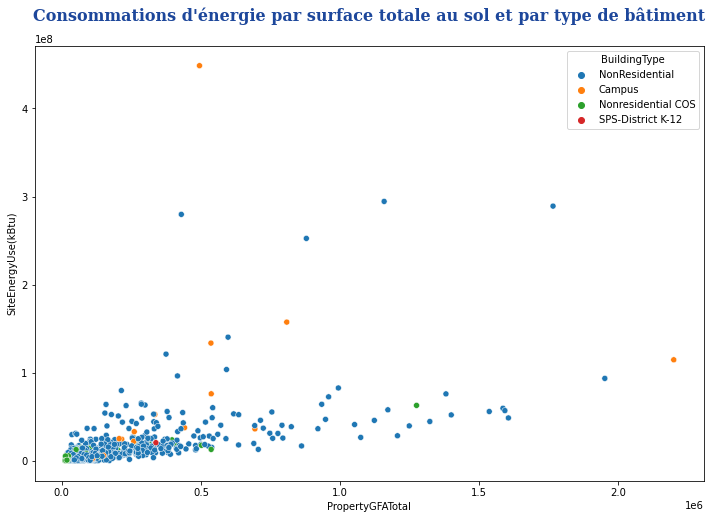

In [6]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = beb_ml_df, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Consommations d'énergie par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.show()

In [7]:
identification_features = ['OSEBuildingID', 'PropertyName', 'Address', 'ZipCode']
beb_ml_df_identification = beb_ml_df[identification_features]
beb_ml_df.drop(identification_features, axis=1, inplace = True)

In [8]:
df_filter = beb_ml_df.drop(['SteamUse(kBtu)','Electricity(kBtu)',
                         'NaturalGas(kBtu)'], axis=1)

### III-Encodage et standardisation 

In [9]:
numerical_features = df_filter.select_dtypes(include=['int64','float64'])
categorical_features = df_filter.select_dtypes(exclude=['int64','float64']) 

In [8]:
categorical_features.nunique()

BuildingType                 4
PrimaryPropertyType         22
State                        1
Neighborhood                19
LargestPropertyUseType      57
YearsENERGYSTARCertified    64
dtype: int64

In [10]:
categorical_features = categorical_features.drop(['State','YearsENERGYSTARCertified'], axis=1)

In [11]:
list(numerical_features.columns)

['DataYear',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'BuildingAge',
 'TotalUseTypeNumber',
 'GFABuildingRate',
 'GFAParkingRate',
 'GFAPerBuilding',
 'GFAPerFloor',
 'harvesine_distance']

In [12]:
energystar_score = numerical_features['ENERGYSTARScore']
numerical_features = numerical_features.drop(['ENERGYSTARScore','DataYear'], axis=1)

In [14]:
df_filter = pd.concat([categorical_features, numerical_features], axis=1)

### III-1-Préparation et préprocessing 

In [15]:
target_features = ['BuildingType','PrimaryPropertyType','Neighborhood','LargestPropertyUseType']
target_transformer = TargetEncoder()

numeric_features = ['harvesine_distance','NumberofBuildings','NumberofFloors',
                    'PropertyGFATotal','BuildingAge','TotalUseTypeNumber',
                    'GFABuildingRate','GFAParkingRate','GFAPerBuilding','GFAPerFloor']
numeric_transformer = RobustScaler(unit_variance=True)

preprocessor = ColumnTransformer(transformers=[
    ('target', target_transformer, target_features),
    ('numeric', numeric_transformer, numeric_features)
])

### III-2-Préparation du jeu d'entrainement et de jeu test

In [16]:
X = df_filter.drop(['TotalGHGEmissions','SiteEnergyUse(kBtu)'], axis=1)
Y = df_filter[['TotalGHGEmissions','SiteEnergyUse(kBtu)']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 1258 lignes,
Test: 315 lignes.



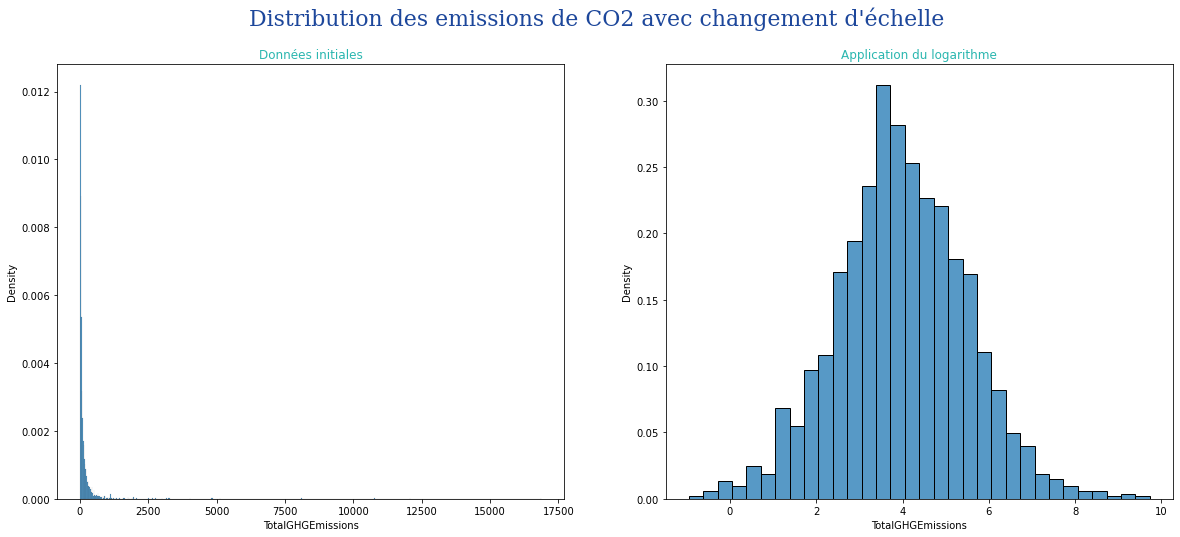

In [17]:
logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
Y_log = logtransformer.transform(Y)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=Y, x='TotalGHGEmissions', stat="density", ax=axes[0])
axes[0].set_title("Données initiales", color='#2cb7b0')
sns.histplot(data=Y_log, x='TotalGHGEmissions', stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme", color='#2cb7b0')
plt.suptitle("Distribution des emissions de CO2 avec changement d'échelle", fontdict=font_title, fontsize=22)
plt.show()

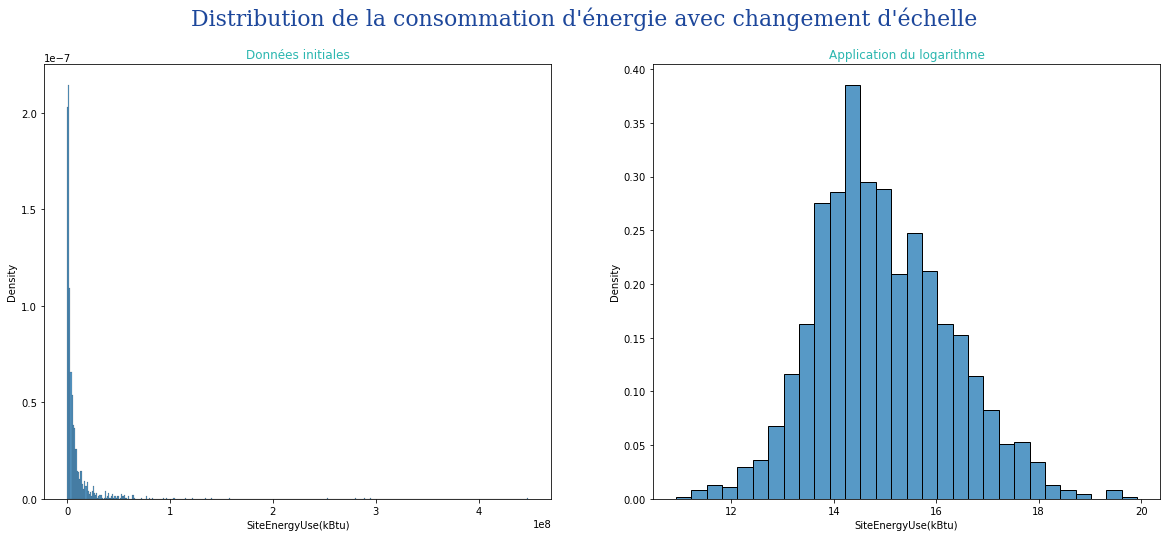

In [18]:
logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
Y_log = logtransformer.transform(Y)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=Y, x='SiteEnergyUse(kBtu)', stat="density", ax=axes[0])
axes[0].set_title("Données initiales", color='#2cb7b0')
sns.histplot(data=Y_log, x='SiteEnergyUse(kBtu)', stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme", color='#2cb7b0')
plt.suptitle("Distribution de la consommation d'énergie avec changement d'échelle", fontdict=font_title, fontsize=22)
plt.show()

### IV-Modèles de prédiction des variables

### IV-1-Modéle linéaire 

### IV-1-1-Modèle basique de régression linéaire multivariée 

In [19]:
param_mlr = {"regressor__fit_intercept": [True, False],
             "regressor__normalize": [True, False]}

mlr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_mlr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=LinearRegression(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_mlr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

In [20]:
#La fonction qui suit permet de faire un:
#Retour des meilleurs scores NMAE et R2
#Stockage du dataframe de resultats du modèle

def model_scores(pip,step):
    df_results = pd.DataFrame.from_dict(pip.named_steps[step].cv_results_) \
                    .sort_values('rank_test_neg_mean_absolute_error')
    best_nmae = pip.named_steps[step].best_score_
    best_r2 = np.mean(df_results[df_results.rank_test_r2 == 1]['mean_test_r2'])
    best_params = pip.named_steps[step].best_params_
    training_time = round((np.mean(df_results.mean_fit_time)*X_train.shape[0]),2)
    print("Meilleur score MAE : {}\nMeilleur Score R2 : {}\nMeilleurs paramètres : {}\nTemps moyen d'entrainement : {}s"\
         .format(round(best_nmae,3), round(best_r2,3), best_params, training_time))
    return df_results

In [21]:
#Entrainement sur les deux variables à expliquer :
GHG_mlr_model = mlr_grid_cv.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_mlr_results = model_scores(GHG_mlr_model, 'grid_search_mlr')

Meilleur score MAE : -330.183
Meilleur Score R2 : -31.506
Meilleurs paramètres : {'regressor__fit_intercept': True, 'regressor__normalize': False}
Temps moyen d'entrainement : 9.83s


In [22]:
SEU_mlr_model = mlr_grid_cv.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_mlr_results = model_scores(SEU_mlr_model, 'grid_search_mlr')

Meilleur score MAE : -12243827.99
Meilleur Score R2 : -31.985
Meilleurs paramètres : {'regressor__fit_intercept': True, 'regressor__normalize': True}
Temps moyen d'entrainement : 2.65s


In [23]:
GHG_mlr_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__fit_intercept,param_regressor__normalize,params,split0_test_r2,split1_test_r2,split2_test_r2,...,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_train_neg_mean_absolute_error,split1_train_neg_mean_absolute_error,split2_train_neg_mean_absolute_error,split3_train_neg_mean_absolute_error,split4_train_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,std_train_neg_mean_absolute_error
1,0.009372,0.007653,0.0,0.0,True,False,"{'regressor__fit_intercept': True, 'regressor_...",-0.619259,-154.247384,0.092198,...,-330.183464,295.321349,1,-304.915753,-169.198661,-225.551364,-210.713847,-209.220692,-223.920063,44.604642
0,0.015624,0.000005,0.0,0.0,True,True,"{'regressor__fit_intercept': True, 'regressor_...",-0.619259,-154.247384,0.092198,...,-330.183464,295.321349,2,-304.915753,-169.198661,-225.551364,-210.713847,-209.220692,-223.920063,44.604642
2,0.003124,0.006247,0.0,0.0,False,True,"{'regressor__fit_intercept': False, 'regressor...",-34.442670,-40666.187462,-104.050094,...,-3381.790660,4050.105898,3,-1619.686613,-734.138234,-956.448721,-905.848627,-566.214169,-956.467273,358.928914
3,0.003124,0.006249,0.0,0.0,False,False,"{'regressor__fit_intercept': False, 'regressor...",-34.442670,-40666.187462,-104.050094,...,-3381.790660,4050.105898,3,-1619.686613,-734.138234,-956.448721,-905.848627,-566.214169,-956.467273,358.928914


In [24]:
SEU_mlr_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('target', TargetEncoder(),
                                                  ['BuildingType',
                                                   'PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'LargestPropertyUseType']),
                                                 ('numeric',
                                                  RobustScaler(unit_variance=True),
                                                  ['harvesine_distance',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'BuildingAge',
                                                   'TotalUseTypeNumber',
                                                   'GFABuildingRate',
                                                   'GFAP...
                                                   'GFAPerFloor'])])),
                ('grid_search_mlr',
                 GridSearchCV(cv=5,
                              estimator=TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=LinearRegression()),
                              n_jobs=-1,
                              param_grid={'regressor__fit_intercept': [True,
                                                                       False],
                                          'regressor__normalize': [True,
                                                                   False]},
                              refit='neg_mean_absolute_error',
                              return_train_score=True,
                              scoring=('r2', 'neg_mean_absolute_error')))])

### IV-1-2-Modèle Elastic Net 

In [25]:
param_eNet = {"regressor__max_iter": [10, 100, 1000],
              "regressor__alpha": np.logspace(-4, 0, num=5),
              "regressor__l1_ratio": np.arange(0.0, 1.1, 0.1)}

eNet_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_enet', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=ElasticNet(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_eNet,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

In [26]:
#Prédiction des emissions de CO2
GHG_eNet_model = eNet_grid_cv.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_eNet_results = model_scores(GHG_eNet_model, 'grid_search_enet')

Meilleur score MAE : -206.63
Meilleur Score R2 : -3.054
Meilleurs paramètres : {'regressor__alpha': 1.0, 'regressor__l1_ratio': 0.9, 'regressor__max_iter': 100}
Temps moyen d'entrainement : 7.1s


In [27]:
#Prédiction consommation d'énergie
SEU_eNet_model = eNet_grid_cv.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_eNet_results = model_scores(SEU_eNet_model, 'grid_search_enet')

Meilleur score MAE : -10295014.616
Meilleur Score R2 : -16.311
Meilleurs paramètres : {'regressor__alpha': 1.0, 'regressor__l1_ratio': 0.9, 'regressor__max_iter': 1000}
Temps moyen d'entrainement : 8.54s


### IV-1-3-Modèle Support Vector Machine (SVM) 

In [28]:
#Modèle Support Vector Regression
param_svr = {'regressor__C' : np.logspace(-4, 0, 5),
             'regressor__epsilon' : [0, 0.01, 0.1, 0.5, 1, 2],
             'regressor__loss' : ["epsilon_insensitive","squared_epsilon_insensitive"],
             'regressor__max_iter': [10, 100, 1000]}

svr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_svr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=LinearSVR(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_svr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [29]:
#Prédiction des emissions de CO2
GHG_svr_model = svr_grid_cv.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_svr_results = model_scores(GHG_svr_model, 'grid_search_svr')

Meilleur score MAE : -3753.349
Meilleur Score R2 : -8144.949
Meilleurs paramètres : {'regressor__C': 0.0001, 'regressor__epsilon': 2, 'regressor__loss': 'epsilon_insensitive', 'regressor__max_iter': 1000}
Temps moyen d'entrainement : 42.39s


C:\Users\archi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [30]:
#Prédiction consommation d'énergie
SEU_svr_model = svr_grid_cv.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_svr_results = model_scores(SEU_svr_model, 'grid_search_svr')

Meilleur score MAE : -8490508.815
Meilleur Score R2 : -0.169
Meilleurs paramètres : {'regressor__C': 0.0001, 'regressor__epsilon': 0, 'regressor__loss': 'epsilon_insensitive', 'regressor__max_iter': 10}
Temps moyen d'entrainement : 34.25s


C:\Users\archi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### IV-2-Modèle non-linéaires 

### IV-2-1- Modèle Random Forest Regressor (RFR)

In [31]:
param_rfr = {'regressor__max_features' : ['sqrt', 'log2'],
             'regressor__max_depth': [5, 15, 25, 50],
             'regressor__min_samples_split': [2, 5, 10],
             'regressor__bootstrap' : [True, False],
             'regressor__min_samples_leaf': [1,2,5,10]}

rfr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_rfr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=RandomForestRegressor(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_rfr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [32]:
#Prédiction des emissions de CO2
GHG_rfr_model = rfr_grid_cv.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_rfr_results = model_scores(GHG_rfr_model, 'grid_search_rfr')

Meilleur score MAE : -115.05
Meilleur Score R2 : 0.542
Meilleurs paramètres : {'regressor__bootstrap': False, 'regressor__max_depth': 50, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2}
Temps moyen d'entrainement : 404.51s


In [33]:
#Prédiction consommation d'énergie
SEU_rfr_model = rfr_grid_cv.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_rfr_results = model_scores(SEU_rfr_model, 'grid_search_rfr')

Meilleur score MAE : -4041358.152
Meilleur Score R2 : 0.565
Meilleurs paramètres : {'regressor__bootstrap': False, 'regressor__max_depth': 15, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2}
Temps moyen d'entrainement : 416.2s


### IV-2-2-Modèle XGBoost 

In [39]:
param_xgb = {'regressor__learning_rate' : [0.001, 0.01, 0.1, 0.2, 0,3],
             'regressor__gamma': [0, 0.25, 0.5, 1.0],
             'regressor__max_depth': [6, 10, 15, 20],
             'regressor__min_child_weight' : [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
             'regressor__n_estimators': [25, 50, 100, 500, 1000]}

xgb_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_xgb', RandomizedSearchCV(
                            TransformedTargetRegressor(
                                regressor=xgb.XGBRegressor(tree_method='gpu_hist'), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_distributions=param_xgb,
                            n_iter=20,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [40]:
#Prédiction des emissions de CO2
GHG_xgb_model = xgb_grid_cv.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_xgb_results = model_scores(GHG_xgb_model, 'grid_search_xgb')

[17:22:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1


C:\Users\archi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(
C:\Users\archi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


XGBoostError: [17:22:03] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:597: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.

In [41]:
#Prédiction consommation d'énergie
SEU_xgb_model = xgb_grid_cv.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_xgb_results = model_scores(SEU_xgb_model, 'grid_search_xgb')

[17:22:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1


C:\Users\archi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(
C:\Users\archi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


XGBoostError: [17:22:28] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:597: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.

### V-Sélection des modèles 

### V-1-Meilleur modèle de prédiction des émissions de CO2 

In [34]:
metrics = ['mean_fit_time', 'mean_score_time',
           'mean_test_neg_mean_absolute_error',
           'mean_train_neg_mean_absolute_error']
GHG_compare_metrics = pd.concat([pd.DataFrame(GHG_rfr_results[metrics].mean(), columns=['RandomForest']),
           pd.DataFrame(GHG_svr_results[metrics].mean(), columns=['LinearSVR']),
           pd.DataFrame(GHG_eNet_results[metrics].mean(), columns=['ElasticNet']),
           pd.DataFrame(GHG_mlr_results[metrics].mean(), columns=['LinearRegression'])
          ], axis=1)
GHG_final_metrics_compare = pd.DataFrame(columns=metrics, 
                                     index=['RandomForest',
                                            'LinearSVR','ElasticNet',
                                            'LinearRegression'])
for m in metrics:
    GHG_final_metrics_compare[m] = GHG_compare_metrics.loc[m]

In [35]:
GHG_final_metrics_compare

,mean_fit_time,mean_score_time,mean_test_neg_mean_absolute_error,mean_train_neg_mean_absolute_error
RandomForest,0.321553,0.018794,-1.291808e+02,-9.563072e+01
LinearSVR,0.033694,0.001465,-1.112812e+41,-1.895101e+41
ElasticNet,0.005646,0.001250,-3.004376e+02,-2.392321e+02
LinearRegression,0.007811,0.000000,-1.855987e+03,-5.901937e+02


AttributeError: 'list' object has no attribute 'set_title'

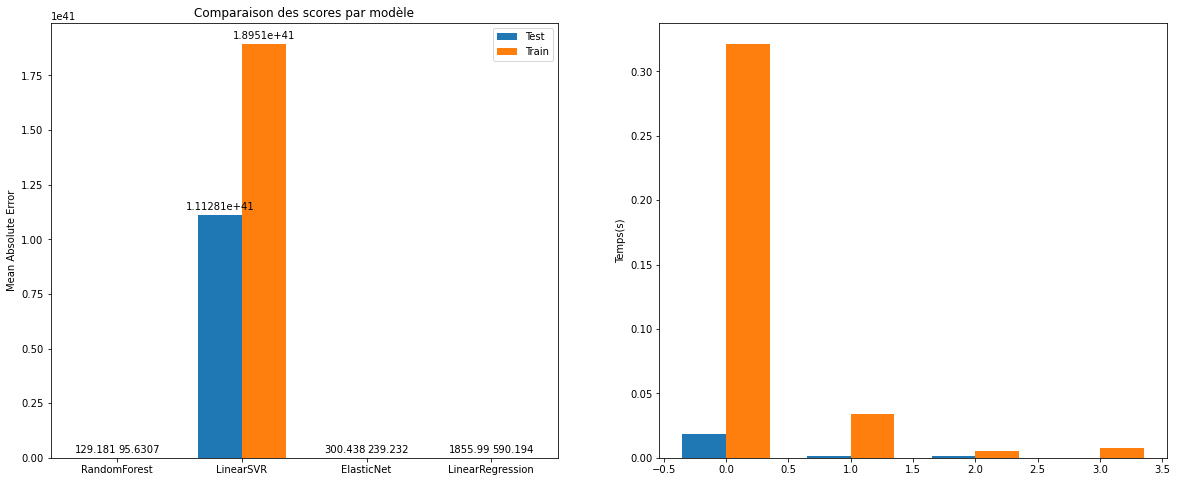

In [36]:
x = np.arange(len(GHG_final_metrics_compare.index))
width = 0.35

fig, ax = plt.subplots(1,2,figsize=(20,8), sharey=False, sharex=False)

scores1 = ax[0].bar(x - width/2, -1*GHG_final_metrics_compare['mean_test_neg_mean_absolute_error'], width, label='Test')
scores2 = ax[0].bar(x + width/2, -1*GHG_final_metrics_compare['mean_train_neg_mean_absolute_error'], width, label='Train')
ax[0].set_ylabel('Mean Absolute Error')
ax[0].set_title('Comparaison des scores par modèle')
ax[0].set_xticks(x)
ax[0].set_xticklabels(GHG_final_metrics_compare.index)
ax[0].legend()
ax[0].bar_label(scores1, padding=3)
ax[0].bar_label(scores2, padding=3)

times1 = ax[1].bar(x - width/2, GHG_final_metrics_compare['mean_score_time'], width, label='Predict')
times2 = ax[1].bar(x + width/2, GHG_final_metrics_compare['mean_fit_time'], width, label='Fit')
ax[1].set_ylabel('Temps(s)')
[1].set_title("Comparaison des temps d'entrainement et prédiction")
ax[1].set_xticks(x)
ax[1].set_xticklabels(GHG_final_metrics_compare.index)
ax[1].legend()
[1].bar_label(times1, padding=3, fmt='%.3f')
ax[1].bar_label(times2, padding=3, fmt='%.3f')

plt.suptitle("Modélisations sur la variable TotalGHGEmissions qui represente les émissions de CO2", fontdict=font_title, fontsize=22)
fig.tight_layout()

plt.show()

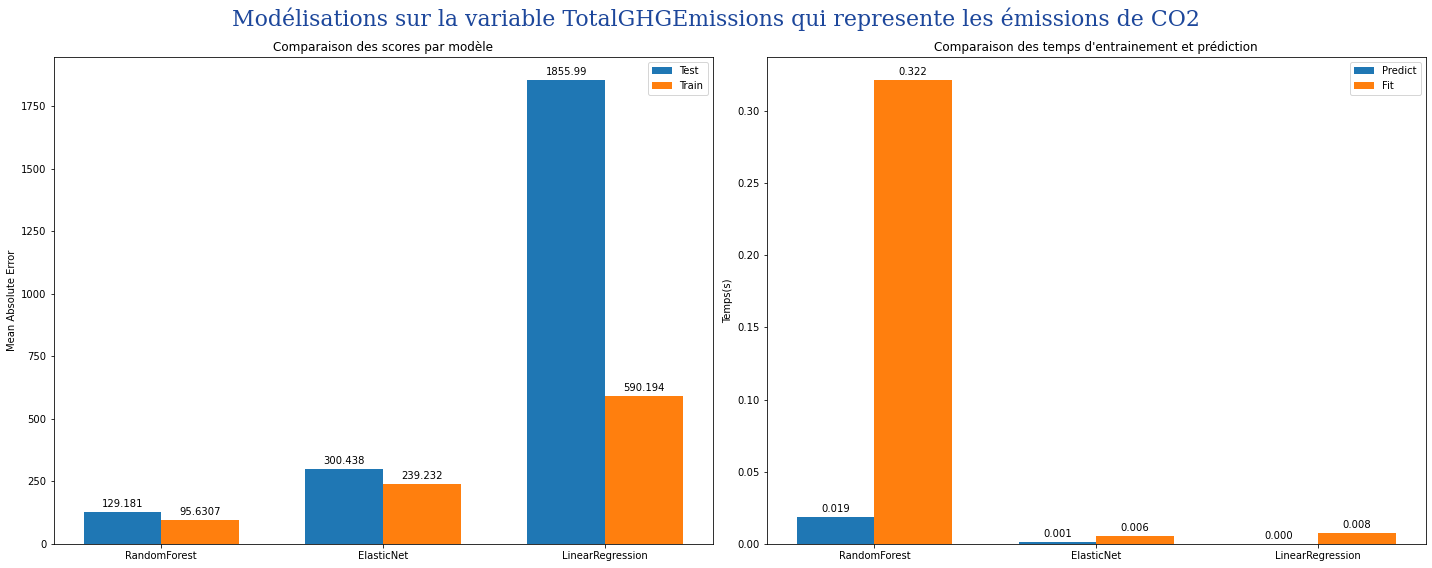

In [37]:
#Le modèle SVR est éliminé de cette représentation car ses valeurs sont hors normes
GHG_final_metrics_compare = GHG_final_metrics_compare[GHG_final_metrics_compare.index != 'LinearSVR']
x = np.arange(len(GHG_final_metrics_compare.index))
width = 0.35

fig, ax = plt.subplots(1,2,figsize=(20,8), sharey=False, sharex=False)

scores1 = ax[0].bar(x - width/2, -1*GHG_final_metrics_compare['mean_test_neg_mean_absolute_error'], width, label='Test')
scores2 = ax[0].bar(x + width/2, -1*GHG_final_metrics_compare['mean_train_neg_mean_absolute_error'], width, label='Train')
ax[0].set_ylabel('Mean Absolute Error')
ax[0].set_title('Comparaison des scores par modèle')
ax[0].set_xticks(x)
ax[0].set_xticklabels(GHG_final_metrics_compare.index)
ax[0].legend()
ax[0].bar_label(scores1, padding=3)
ax[0].bar_label(scores2, padding=3)

times1 = ax[1].bar(x - width/2, GHG_final_metrics_compare['mean_score_time'], width, label='Predict')
times2 = ax[1].bar(x + width/2, GHG_final_metrics_compare['mean_fit_time'], width, label='Fit')
ax[1].set_ylabel('Temps(s)')
ax[1].set_title("Comparaison des temps d'entrainement et prédiction")
ax[1].set_xticks(x)
ax[1].set_xticklabels(GHG_final_metrics_compare.index)
ax[1].legend()
ax[1].bar_label(times1, padding=3, fmt='%.3f')
ax[1].bar_label(times2, padding=3, fmt='%.3f')

plt.suptitle("Modélisations sur la variable TotalGHGEmissions qui represente les émissions de CO2", fontdict=font_title, fontsize=22)
fig.tight_layout()

plt.show()

In [38]:
#Fonction d'affichage des scores de GridSearch pour chacun des paramètres
def plot_search_results(grid, title): 
       
    #Résultats de la GridSearch
    results = grid.cv_results_
    means_test = results['mean_test_neg_mean_absolute_error']
    stds_test = results['std_test_neg_mean_absolute_error']
    means_train = results['mean_train_neg_mean_absolute_error']
    stds_train = results['std_train_neg_mean_absolute_error']

    #Index de valeurs par hyper-paramètre
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid
    
    #Plot des résultats
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Scores par paramètres pour la variable {}'.format(title), 
                 fontdict=font_title, fontsize=22)
    fig.text(0.04, 0.5, 'NEG MEAN ABSOLUTE ERROR SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test', color="#2cb7b0")
        ax[i].errorbar(x, y_2, e_2, linestyle='--', marker='o', label='train', color="#337da4")
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()
    
    print("\nRappel des meilleurs paramètres :\n{}".format(grid.best_params_))

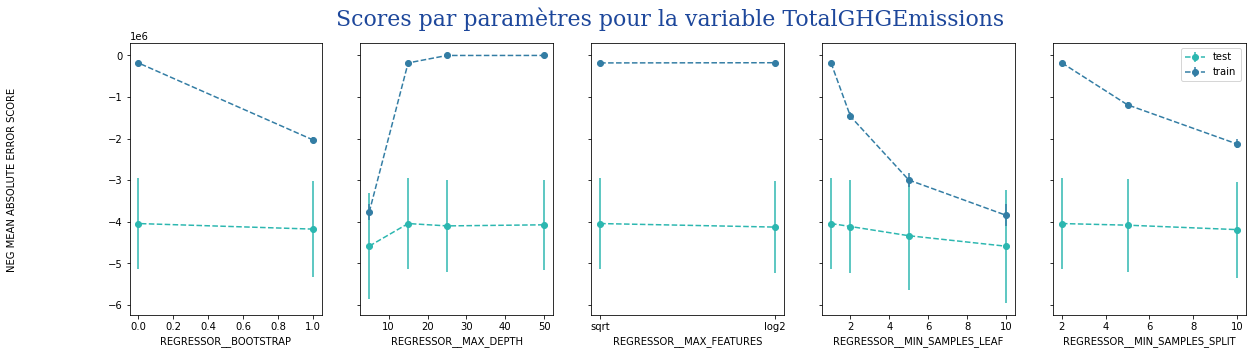


Rappel des meilleurs paramètres :
{'regressor__bootstrap': False, 'regressor__max_depth': 15, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2}


In [39]:
plot_search_results(GHG_rfr_model.named_steps['grid_search_rfr'], title="TotalGHGEmissions")

In [40]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
        
    ------
    Code from :
        https://johaupt.github.io/
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [f for f in column]

        return [f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        feature_names.extend(get_names(trans))
    
    return feature_names

C:\Users\archi\AppData\Local\Temp/ipykernel_15732/2719519751.py:34: UserWarning: Transformer numeric (type RobustScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


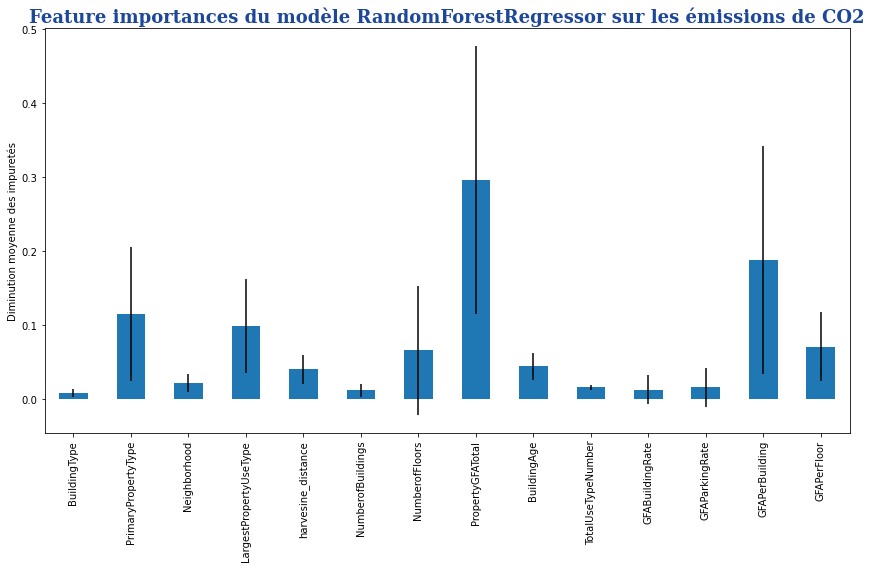

In [41]:
feature_importance = GHG_rfr_model.named_steps['grid_search_rfr'].best_estimator_.regressor_.feature_importances_ 
features_names = get_feature_names(GHG_rfr_model.named_steps['preprocessor'])
std = np.std([
    tree.feature_importances_ for tree in GHG_rfr_model.named_steps['grid_search_rfr'].best_estimator_.regressor_], axis=0)
df_feature_importance = pd.Series(feature_importance, index=features_names)

fig, ax = plt.subplots(figsize=(12,8))
df_feature_importance.plot.bar(yerr=std, ax=ax) #essayer avec .barh et organiser df_featuring avant avec sort_values
ax.set_title("Feature importances du modèle RandomForestRegressor sur les émissions de CO2", fontdict=font_title)
ax.set_ylabel("Diminution moyenne des impuretés")
fig.tight_layout()

### V-2-Meilleur modèle de prédiction de la consommation d'énergie

In [48]:
SEU_compare_metrics = pd.concat([pd.DataFrame(SEU_rfr_results[metrics].mean(), columns=['RandomForest']),
           pd.DataFrame(SEU_svr_results[metrics].mean(), columns=['LinearSVR']),
           pd.DataFrame(SEU_eNet_results[metrics].mean(), columns=['ElasticNet']),
           pd.DataFrame(SEU_mlr_results[metrics].mean(), columns=['LinearRegression'])
          ], axis=1)
SEU_final_metrics_compare = pd.DataFrame(columns=metrics, 
                                     index=['RandomForest',
                                            'LinearSVR','ElasticNet',
                                            'LinearRegression'])
for m in metrics:
    SEU_final_metrics_compare[m] = SEU_compare_metrics.loc[m]
SEU_compare_metrics

,RandomForest,LinearSVR,ElasticNet,LinearRegression
mean_fit_time,3.308453e-01,2.722493e-02,6.790474e-03,2.108228e-03
mean_score_time,1.901322e-02,1.544478e-03,1.366987e-03,6.006002e-04
mean_test_neg_mean_absolute_error,-4.465235e+06,-8.490509e+06,-1.269508e+07,-5.707393e+10
mean_train_neg_mean_absolute_error,-3.207140e+06,-8.490154e+06,-1.001745e+07,-2.727690e+10


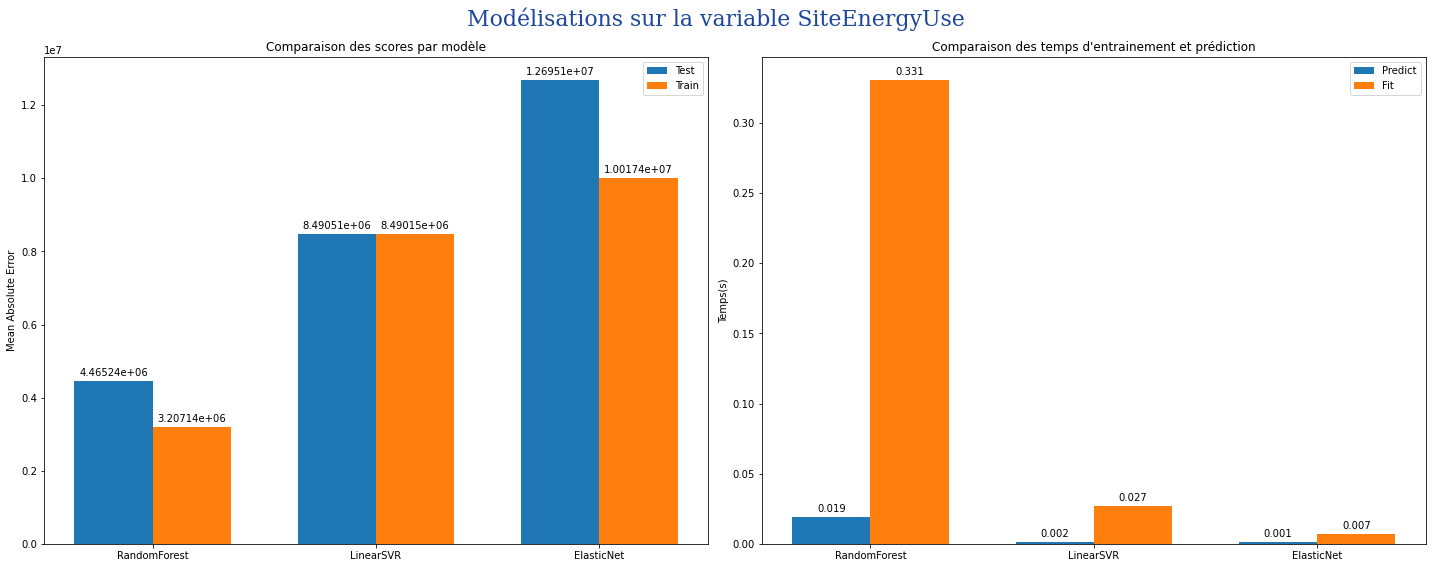

In [49]:
#Ici aussi il y a un modéle (Linear Regression) qui semble avoir des valeurs hors normes
SEU_final_metrics_compare = SEU_final_metrics_compare[SEU_final_metrics_compare.index != 'LinearRegression']

x = np.arange(len(SEU_final_metrics_compare.index))
width = 0.35

fig, ax = plt.subplots(1,2,figsize=(20,8), sharey=False, sharex=False)

scores1 = ax[0].bar(x - width/2, -1*SEU_final_metrics_compare['mean_test_neg_mean_absolute_error'], width, label='Test')
scores2 = ax[0].bar(x + width/2, -1*SEU_final_metrics_compare['mean_train_neg_mean_absolute_error'], width, label='Train')
ax[0].set_ylabel('Mean Absolute Error')
ax[0].set_title('Comparaison des scores par modèle')
ax[0].set_xticks(x)
ax[0].set_xticklabels(SEU_final_metrics_compare.index)
ax[0].legend()
ax[0].bar_label(scores1, padding=3)
ax[0].bar_label(scores2, padding=3)

times1 = ax[1].bar(x - width/2, SEU_final_metrics_compare['mean_score_time'], width, label='Predict')
times2 = ax[1].bar(x + width/2, SEU_final_metrics_compare['mean_fit_time'], width, label='Fit')
ax[1].set_ylabel('Temps(s)')
ax[1].set_title("Comparaison des temps d'entrainement et prédiction")
ax[1].set_xticks(x)
ax[1].set_xticklabels(SEU_final_metrics_compare.index)
ax[1].legend()
ax[1].bar_label(times1, padding=3, fmt='%.3f')
ax[1].bar_label(times2, padding=3, fmt='%.3f')

plt.suptitle("Modélisations sur la variable SiteEnergyUse", fontdict=font_title, fontsize=22)
fig.tight_layout()

plt.show()

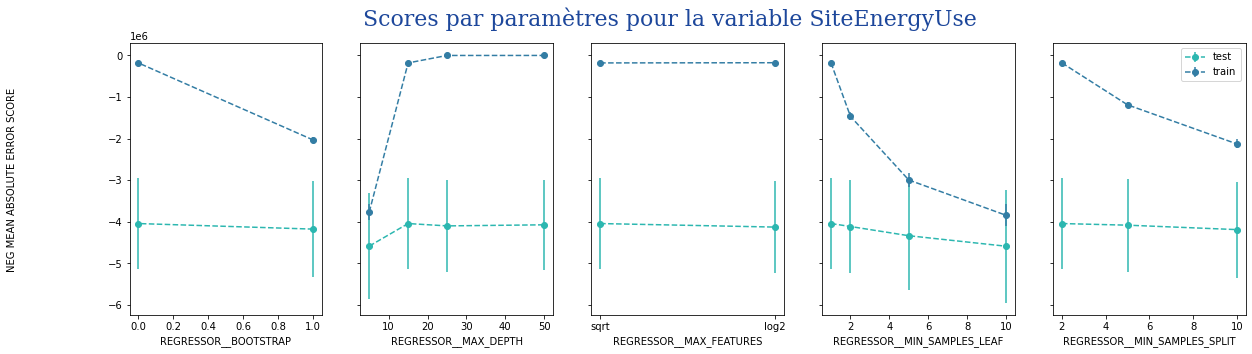


Rappel des meilleurs paramètres :
{'regressor__bootstrap': False, 'regressor__max_depth': 15, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2}


In [50]:
plot_search_results(SEU_rfr_model.named_steps['grid_search_rfr'], title="SiteEnergyUse")

C:\Users\archi\AppData\Local\Temp/ipykernel_15732/2719519751.py:34: UserWarning: Transformer numeric (type RobustScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


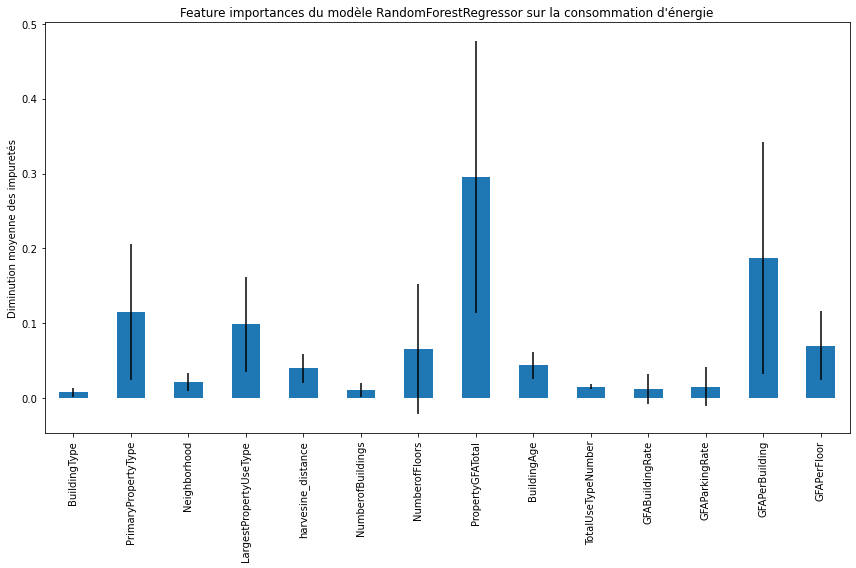

In [51]:
feature_importance = SEU_rfr_model.named_steps['grid_search_rfr'].best_estimator_.regressor_.feature_importances_ 
features_names = get_feature_names(SEU_rfr_model.named_steps['preprocessor'])
std = np.std([
    tree.feature_importances_ for tree in SEU_rfr_model.named_steps['grid_search_rfr'].best_estimator_.regressor_], axis=0)
df_feature_importance = pd.Series(feature_importance, index=features_names)

fig, ax = plt.subplots(figsize=(12,8))
df_feature_importance.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances du modèle RandomForestRegressor sur la consommation d'énergie")
ax.set_ylabel("Diminution moyenne des impuretés")
fig.tight_layout()

### VI-Vérification de la pertinence du modéle sélectionné 

### VI-1-Pertinence du modèle de prédiction des émissions de CO2 

In [52]:
def metrics_model(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    diff = y_true - y_pred
    mae = np.mean(abs(diff))
    r2 = 1-(sum(diff**2)/sum((y_true-np.mean(y_true))**2))
    dict_metrics = {"Métrique":["MAE", "R²"], "Résultats":[mae, r2]}
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics

In [53]:
def plot_pred_true(y_true, y_pred, color=None, title=None):
    X_plot = [y_true.min(), y_true.max()]
    fig = plt.figure(figsize=(12,8))
    plt.scatter(y_true, y_pred, color=color, alpha=.6)
    plt.plot(X_plot, X_plot, color='r')
    plt.xlabel("Valeurs réélles")
    plt.ylabel("Valeurs prédites")
    plt.title("Valeurs prédites VS valeurs réélles | Variable {}".format(title), 
              fontdict=font_title, fontsize=18)
    plt.show()

In [54]:
#Modèle avec les meilleurs paramètres pour les émissions de CO2

start_time = time.time()

GHG_pred = GHG_rfr_model.predict(X_test)

print("Temps d'execution de l'agorithme : {:.2} s.".format((time.time() - start_time)))

Temps d'execution de l'agorithme : 0.035 s.


In [55]:
#Calcul des métriques pour les émissions de CO2
GHGmetrics = metrics_model(Y_test['TotalGHGEmissions'],GHG_pred)
GHGmetrics

,Métrique,Résultats
0,MAE,5.959336e+06
1,R²,-7.062730e+08


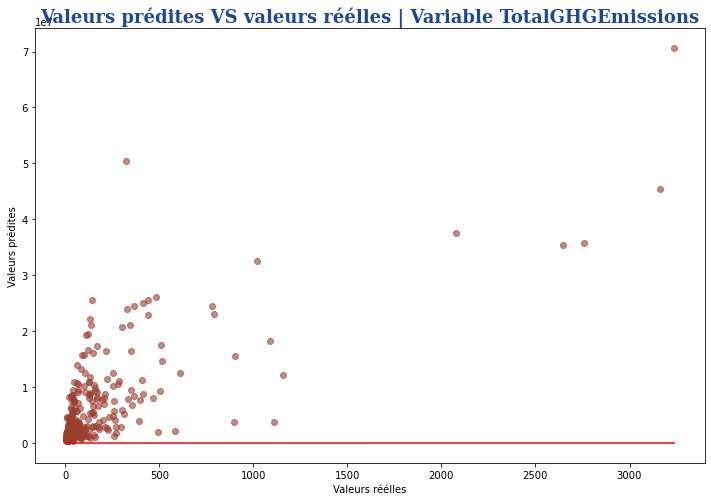

In [56]:
#Affichage des valeurs prédites vs valeurs réélles pour émissions de CO2
plot_pred_true(Y_test['TotalGHGEmissions'],GHG_pred, color="#9C3E2D", title="TotalGHGEmissions")

In [57]:
GHG_test_results = GHG_rfr_results[['split0_test_neg_mean_absolute_error',
                'split1_test_neg_mean_absolute_error',
                'split2_test_neg_mean_absolute_error',
                'split3_test_neg_mean_absolute_error',
                'split4_test_neg_mean_absolute_error',
                ]][GHG_rfr_results['rank_test_neg_mean_absolute_error']==1].values
GHG_train_results = GHG_rfr_results[['split0_train_neg_mean_absolute_error',
                'split1_train_neg_mean_absolute_error',
                'split2_train_neg_mean_absolute_error',
                'split3_train_neg_mean_absolute_error',
                'split4_train_neg_mean_absolute_error',
                ]][GHG_rfr_results['rank_test_neg_mean_absolute_error']==1].values

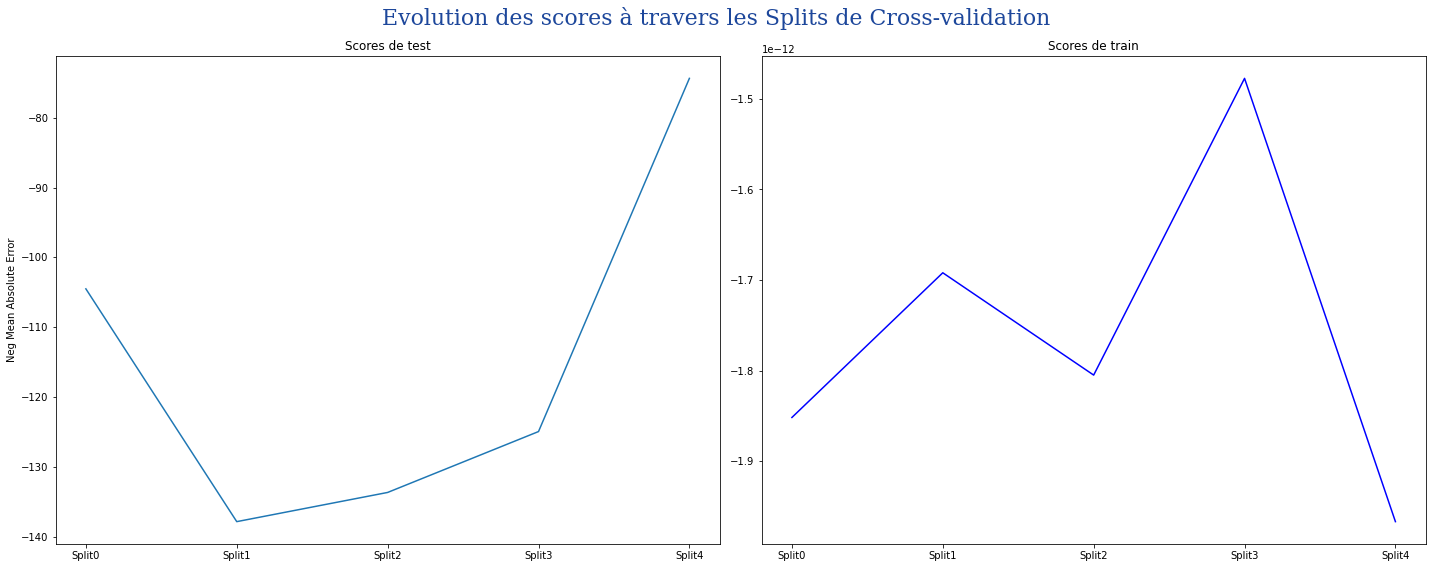

In [58]:
x = np.arange(0,5,1)
fig, ax = plt.subplots(1,2, figsize=(20,8), sharey=False, sharex=False)
ax[0].plot(range(0,5), GHG_test_results.reshape(-1))
ax[0].set_xticks(x)
ax[0].set_xticklabels(["Split"+str(n) for n in range(0,5)])
ax[0].set_ylabel('Neg Mean Absolute Error')
ax[0].set_title('Scores de test')

ax[1].plot(range(0,5), GHG_train_results.reshape(-1), color='b')
ax[1].set_xticks(x)
ax[1].set_xticklabels(["Split"+str(n) for n in range(0,5)])
ax[1].set_title('Scores de train')

plt.suptitle("Evolution des scores à travers les Splits de Cross-validation", fontdict=font_title, fontsize=22)
fig.tight_layout()

plt.show()

### VI-2-Pertinence du modèle de prédiction de la consommation d'énergie 

In [60]:
start_time = time.time()

SEU_pred = SEU_rfr_model.predict(X_test)

print("Temps d'execution de l'agorithme : {:.2} s.".format((time.time() - start_time)))

Temps d'execution de l'agorithme : 0.038 s.


In [61]:
#Calcul des métriques pour les émissions de CO2
SEUmetrics = metrics_model(Y_test['SiteEnergyUse(kBtu)'],SEU_pred)
SEUmetrics

,Métrique,Résultats
0,MAE,3.339941e+06
1,R²,6.792940e-01


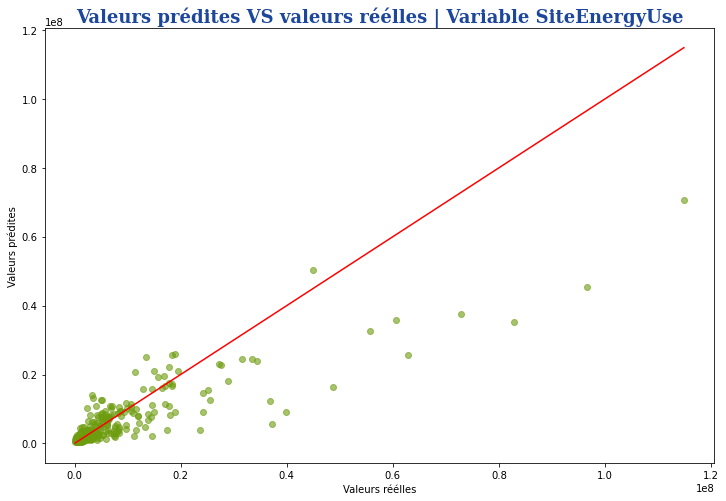

In [62]:
#Affichage des valeurs prédites vs valeurs réélles pour la consommation d'énergie
plot_pred_true(Y_test['SiteEnergyUse(kBtu)'],SEU_pred, color="#6D9C0E", title="SiteEnergyUse")

In [63]:
final_SEU_test = pd.concat([X_test,Y_test],axis=1)
final_SEU_test['SEU_pred'] = SEU_pred
compare_final_SEU_test = final_SEU_test = final_SEU_test.groupby(by='BuildingType').mean()

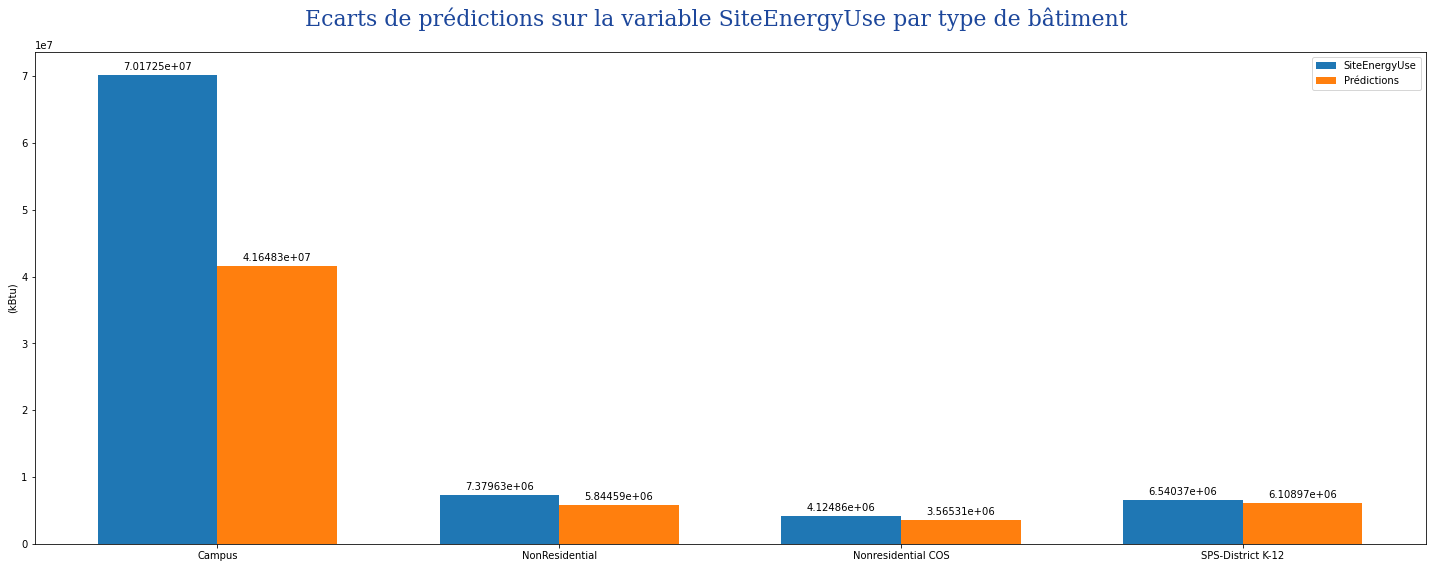

In [64]:
x = np.arange(len(compare_final_SEU_test.index))
width = 0.35

fig, ax = plt.subplots(figsize=(20,8), sharey=False, sharex=False)

scores1 = ax.bar(x - width/2, compare_final_SEU_test['SiteEnergyUse(kBtu)'], width, label='SiteEnergyUse')
scores2 = ax.bar(x + width/2, compare_final_SEU_test['SEU_pred'], width, label='Prédictions')
ax.set_ylabel('(kBtu)')
ax.set_xticks(x)
ax.set_xticklabels(compare_final_SEU_test.index)
ax.legend()
ax.bar_label(scores1, padding=3)
ax.bar_label(scores2, padding=3)

plt.suptitle("Ecarts de prédictions sur la variable SiteEnergyUse par type de bâtiment", fontdict=font_title, fontsize=22)
fig.tight_layout()

plt.show()

### VII-Conclusion 

### VII-1-Influence du score Energy Star 

In [65]:
#Ajout de la variable à nos variables X
X['energystar_score'] = energystar_score

#Ajout de la variable dans les variables numérique du preprocessor
numeric_features.append('energystar_score')

In [66]:
#Filtrage des données ayant un Energy Star Score renseigné
X = X[X['energystar_score'].isnull()==False]
Y = Y[Y.index.isin(list(X.index))]

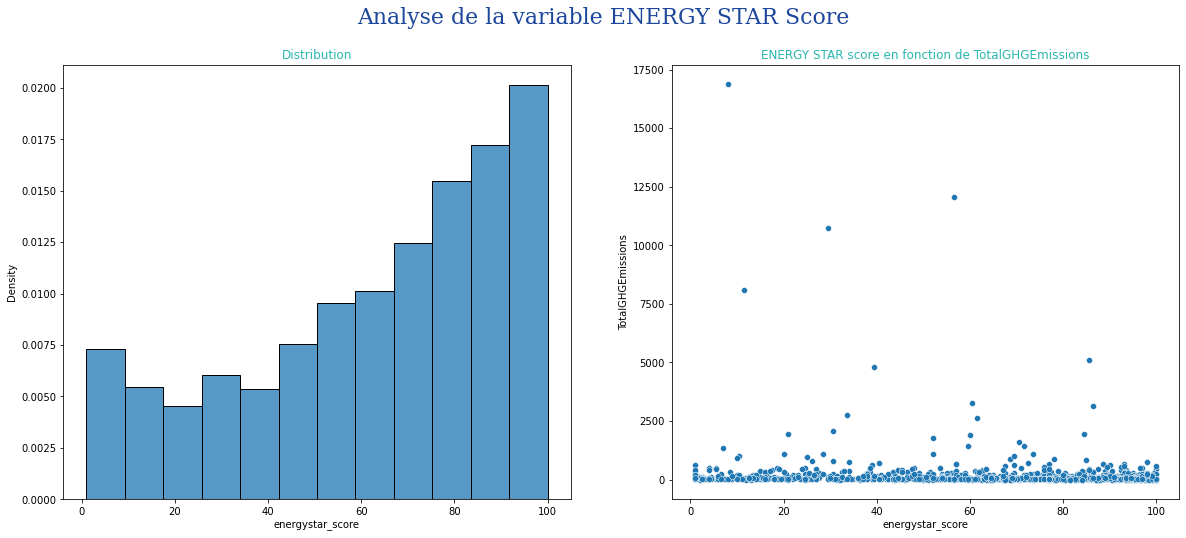

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=X, x='energystar_score', stat="density", ax=axes[0])
axes[0].set_title("Distribution", color='#2cb7b0')
sns.scatterplot(data=pd.concat([X,Y], axis=1), y='TotalGHGEmissions', x='energystar_score', ax=axes[1])
axes[1].set_title("ENERGY STAR score en fonction de TotalGHGEmissions", color='#2cb7b0')
plt.suptitle("Analyse de la variable ENERGY STAR Score", fontdict=font_title, fontsize=22)
plt.show()

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 833 lignes,
Test: 209 lignes.



In [69]:
rfr_grid_cv_eStar = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_rfr_eStar', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=RandomForestRegressor(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_rfr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

GHG_rfr_model_eStar = rfr_grid_cv_eStar.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_rfr_results_eStar = model_scores(GHG_rfr_model_eStar, 'grid_search_rfr_eStar')

Meilleur score MAE : -111.741
Meilleur Score R2 : 0.382
Meilleurs paramètres : {'regressor__bootstrap': False, 'regressor__max_depth': 50, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2}
Temps moyen d'entrainement : 219.9s


In [70]:
GHG_pred_star = GHG_rfr_model_eStar.predict(X_test)
#Calcul des métriques pour les émissions de CO2
GHGmetricsES = metrics_model(Y_test['TotalGHGEmissions'],GHG_pred_star)
GHGmetrics = GHGmetrics.rename(columns={"Résultats" : "Sans ENERGY STAR"})
GHGmetrics['Avec ENERGY STAR'] = GHGmetricsES['Résultats']
GHGmetrics

,Métrique,Sans ENERGY STAR,Avec ENERGY STAR
0,MAE,5.959336e+06,146.371893
1,R²,-7.062730e+08,0.513470


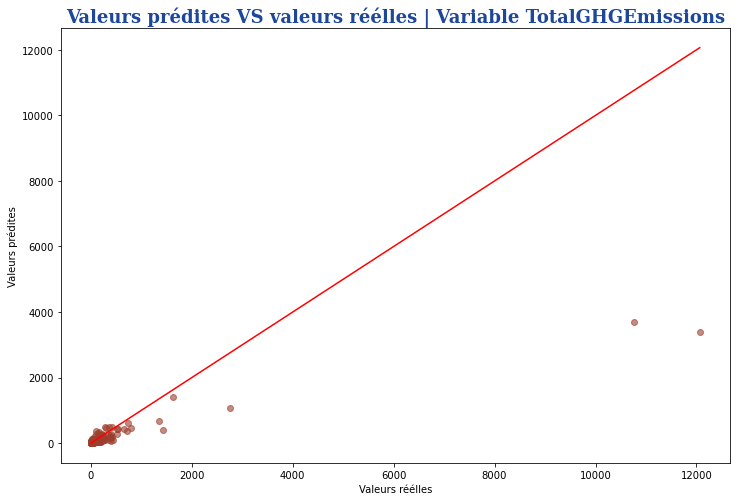

In [71]:
#Affichage des valeurs prédites vs valeurs réélles pour les émissions de CO2
plot_pred_true(Y_test['TotalGHGEmissions'],GHG_pred_star, color="#9C3E2D", title="TotalGHGEmissions")